In [1]:
import pandas as pd

prueba = pd.read_csv('helados-ajuste-completo.csv', sep=';')
prueba.head()

,Ajuste Fecha,Dia Semana,Sabor 1,Sabor 2,Sabor 3,Sabor 4,Sabor 5,Sabor 6,Sabor 7,Sabor 8,...,Sabor 72,Sabor 73,Sabor 74,Sabor 75,Sabor 76,Sabor 77,Sabor 78,Sabor 79,Unnamed: 81,Total Cantidad
0,8/7/19 0:00,Lunes,"20,61","38,54","22,36","20,7","15,74","17,69","47,42","25,69",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/7/19 0:00,Martes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/7/19 0:00,Miércoles,NaN,"-5,56",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12/7/19 0:00,Jueves,"-4,84",NaN,NaN,NaN,NaN,NaN,"-5,41",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13/7/19 0:00,Viernes,"21,5","19,28","33,16","24,78","15,33",NaN,"37,62","12,44",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Limpiar datos de las columnas Sabor 1 a Sabor 79
sabor_cols = [col for col in prueba.columns if col.startswith('Sabor')]
for col in sabor_cols:
    #cambiar el tipo a strin
    prueba[col] = prueba[col].astype(str)  # Cambiar a string

    prueba[col] = prueba[col].str.replace('-', '')  # Reemplazar '-' por '0'
    prueba[col] = prueba[col].str.replace(',', '.')  # Cambiar coma por punto
    prueba[col] = pd.to_numeric(prueba[col], errors='coerce')  # Convertir a float

# Crear la columna Total como la suma de las columnas Sabor
prueba['Total'] = prueba[sabor_cols].sum(axis=1)

prueba.head()

,Ajuste Fecha,Dia Semana,Sabor 1,Sabor 2,Sabor 3,Sabor 4,Sabor 5,Sabor 6,Sabor 7,Sabor 8,...,Sabor 73,Sabor 74,Sabor 75,Sabor 76,Sabor 77,Sabor 78,Sabor 79,Unnamed: 81,Total Cantidad,Total
0,8/7/19 0:00,Lunes,20.61,38.54,22.36,20.70,15.74,17.69,47.42,25.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.16
1,9/7/19 0:00,Martes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.00
2,10/7/19 0:00,Miércoles,NaN,5.56,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.48
3,12/7/19 0:00,Jueves,4.84,NaN,NaN,NaN,NaN,NaN,5.41,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.48
4,13/7/19 0:00,Viernes,21.50,19.28,33.16,24.78,15.33,NaN,37.62,12.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1749.68


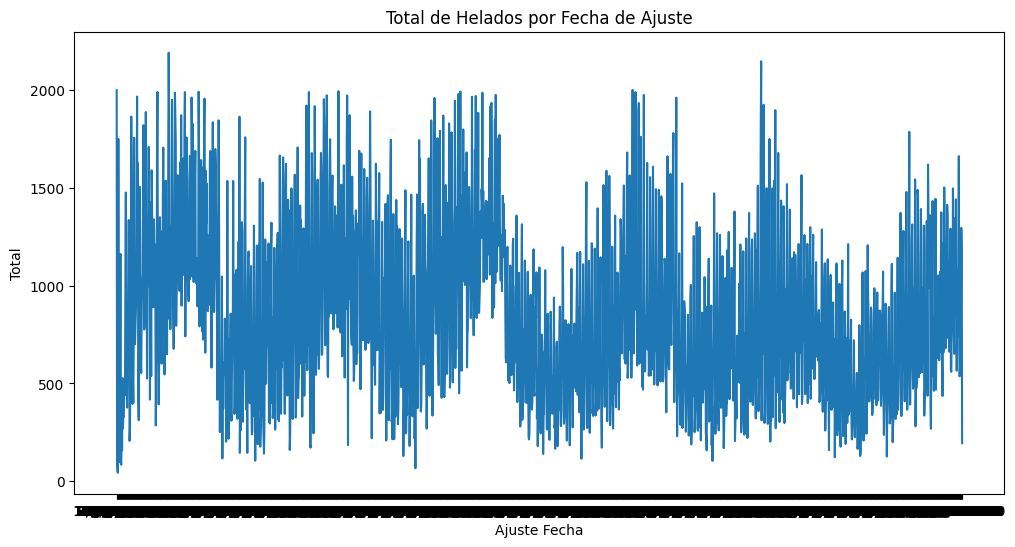

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la columna Total sobre la columnaAjuste Fecha
# plt.figure(figsize=(12, 6))
# plt.plot(prueba['Ajuste Fecha'], prueba['Total'], marker='o', linestyle='-')
# plt.title('Total de Helados por Fecha de Ajuste')
#Con seaborn

plt.figure(figsize=(12, 6))
sns.lineplot(data=prueba, x='Ajuste Fecha', y='Total')
plt.title('Total de Helados por Fecha de Ajuste')
plt.show()

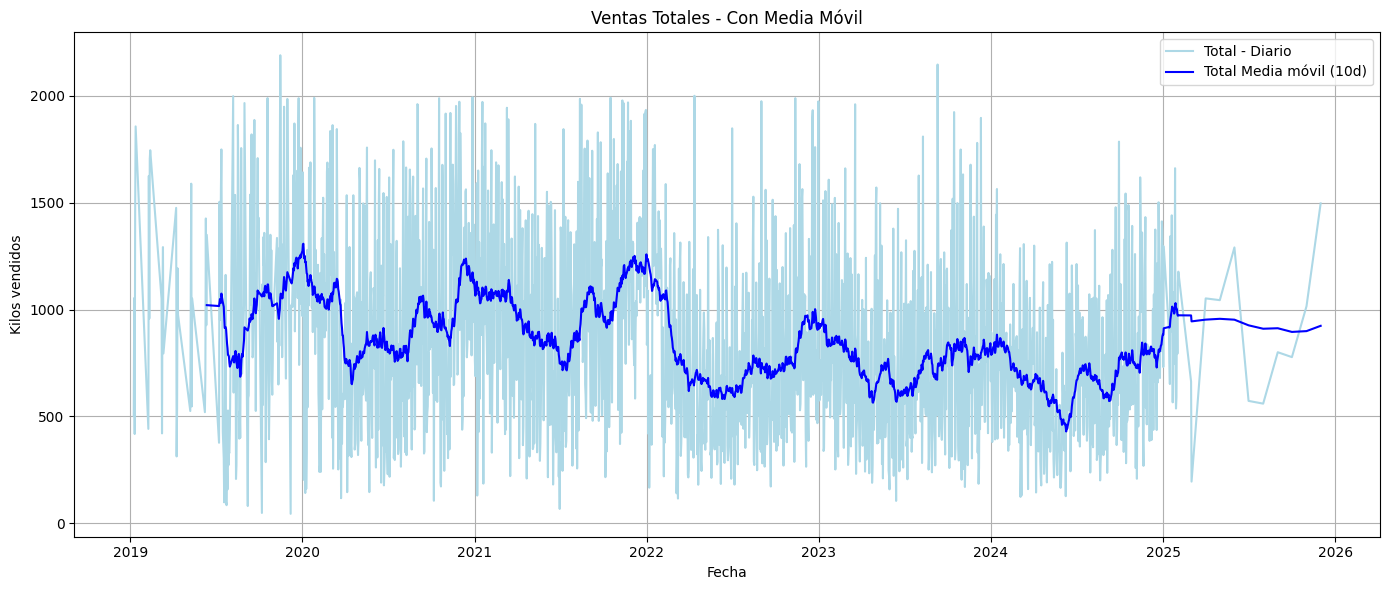

In [8]:
#Cambiar tipo de datos a float
total = prueba['Total']
#sabor2 = prueba['Sabor 2'].str.replace('-', '').str.replace(',','.').astype(float)

prueba['Ajuste Fecha'] = pd.to_datetime(prueba['Ajuste Fecha'])
prueba = prueba.sort_values(by='Ajuste Fecha')
total_rolling = total.rolling(window=30).mean()
#sabor2_rolling = sabor2.rolling(window=10).mean()

plt.figure(figsize=(14, 6))

sns.lineplot(x=prueba['Ajuste Fecha'], y=total, label='Total - Diario', color='lightblue')
sns.lineplot(x=prueba['Ajuste Fecha'], y=total_rolling, label='Total Media móvil (10d)', color='blue')

plt.title('Ventas Totales - Con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Kilos vendidos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Contar la cantidad de sabores con valores no nulos
prueba['Cantidad Sabores'] = prueba[sabor_cols].notnull().sum(axis=1)

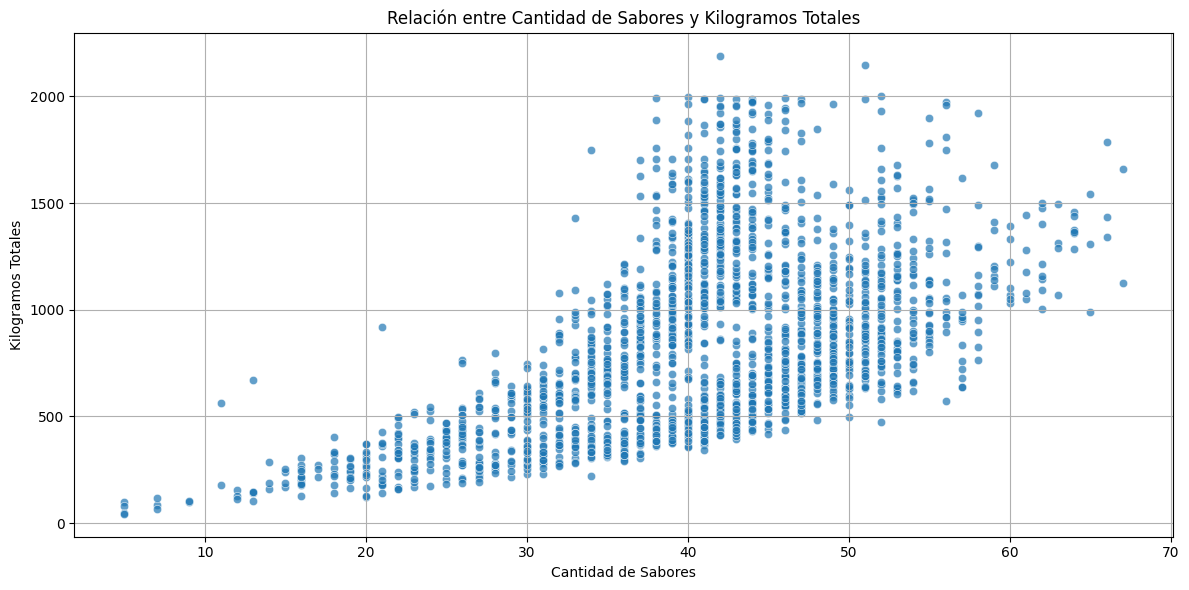

In [10]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=prueba, x='Cantidad Sabores', y='Total', alpha=0.7)
plt.title('Relación entre Cantidad de Sabores y Kilogramos Totales')
plt.xlabel('Cantidad de Sabores')
plt.ylabel('Kilogramos Totales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# Calcular el promedio ponderado de los valores de los sabores
prueba['Promedio Ponderado'] = prueba[sabor_cols].sum(axis=1) / prueba['Cantidad Sabores']

# Reemplazar valores infinitos o NaN (en caso de que Cantidad Sabores sea 0)
prueba['Promedio Ponderado'] = prueba['Promedio Ponderado'].fillna(0)

# Mostrar los primeros resultados
print(prueba[['Cantidad Sabores', 'Total', 'Promedio Ponderado']].head())

     Cantidad Sabores    Total  Promedio Ponderado
19                 28   501.76           17.920000
50                 40  1053.96           26.349000
80                 28   417.12           14.897143
111                41  1462.46           35.669756
141                42  1857.46           44.225238


In [13]:
# Calcular una métrica ajustada que combine cantidad de sabores y promedio ponderado
prueba['Métrica Ajustada'] = prueba['Cantidad Sabores'] * prueba['Promedio Ponderado']

# Mostrar los primeros resultados
print(prueba[['Cantidad Sabores', 'Promedio Ponderado', 'Métrica Ajustada']].head())

     Cantidad Sabores  Promedio Ponderado  Métrica Ajustada
19                 28           17.920000            501.76
50                 40           26.349000           1053.96
80                 28           14.897143            417.12
111                41           35.669756           1462.46
141                42           44.225238           1857.46


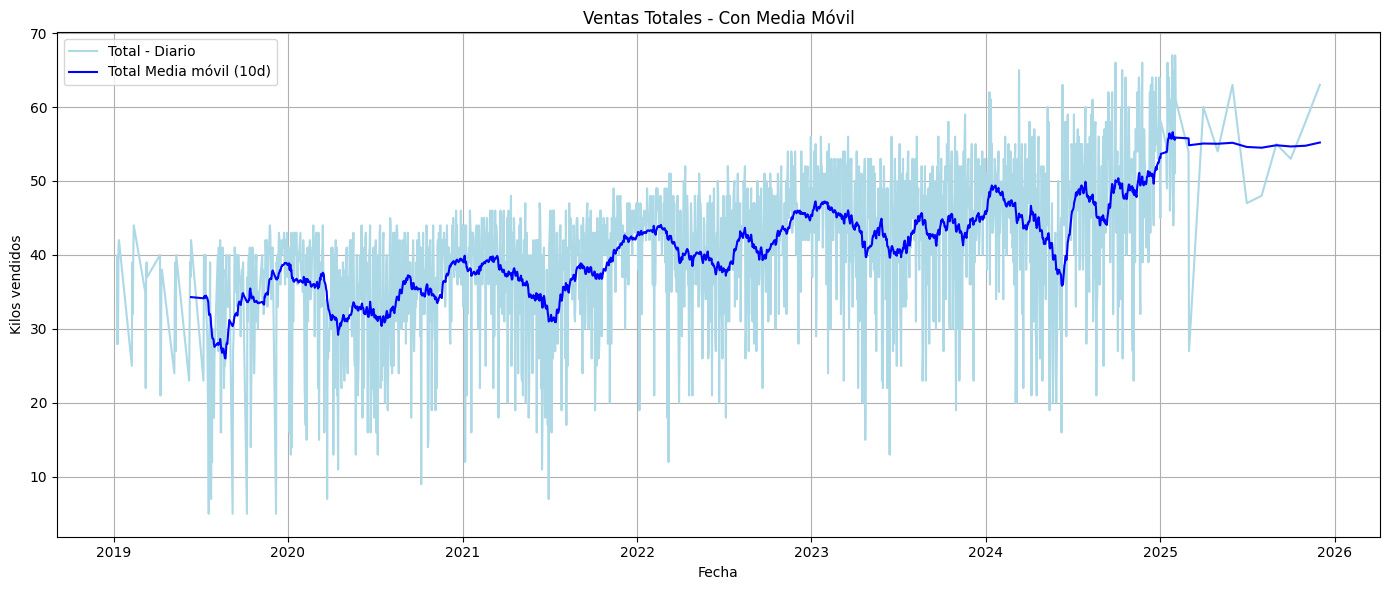

In [15]:
#Cambiar tipo de datos a float
total = prueba['Cantidad Sabores']

prueba['Ajuste Fecha'] = pd.to_datetime(prueba['Ajuste Fecha'])
prueba = prueba.sort_values(by='Ajuste Fecha')
total_rolling = total.rolling(window=30).mean()
#sabor2_rolling = sabor2.rolling(window=10).mean()

plt.figure(figsize=(14, 6))

sns.lineplot(x=prueba['Ajuste Fecha'], y=total, label='Total - Diario', color='lightblue')
sns.lineplot(x=prueba['Ajuste Fecha'], y=total_rolling, label='Total Media móvil (10d)', color='blue')

plt.title('Ventas Totales - Con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Kilos vendidos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

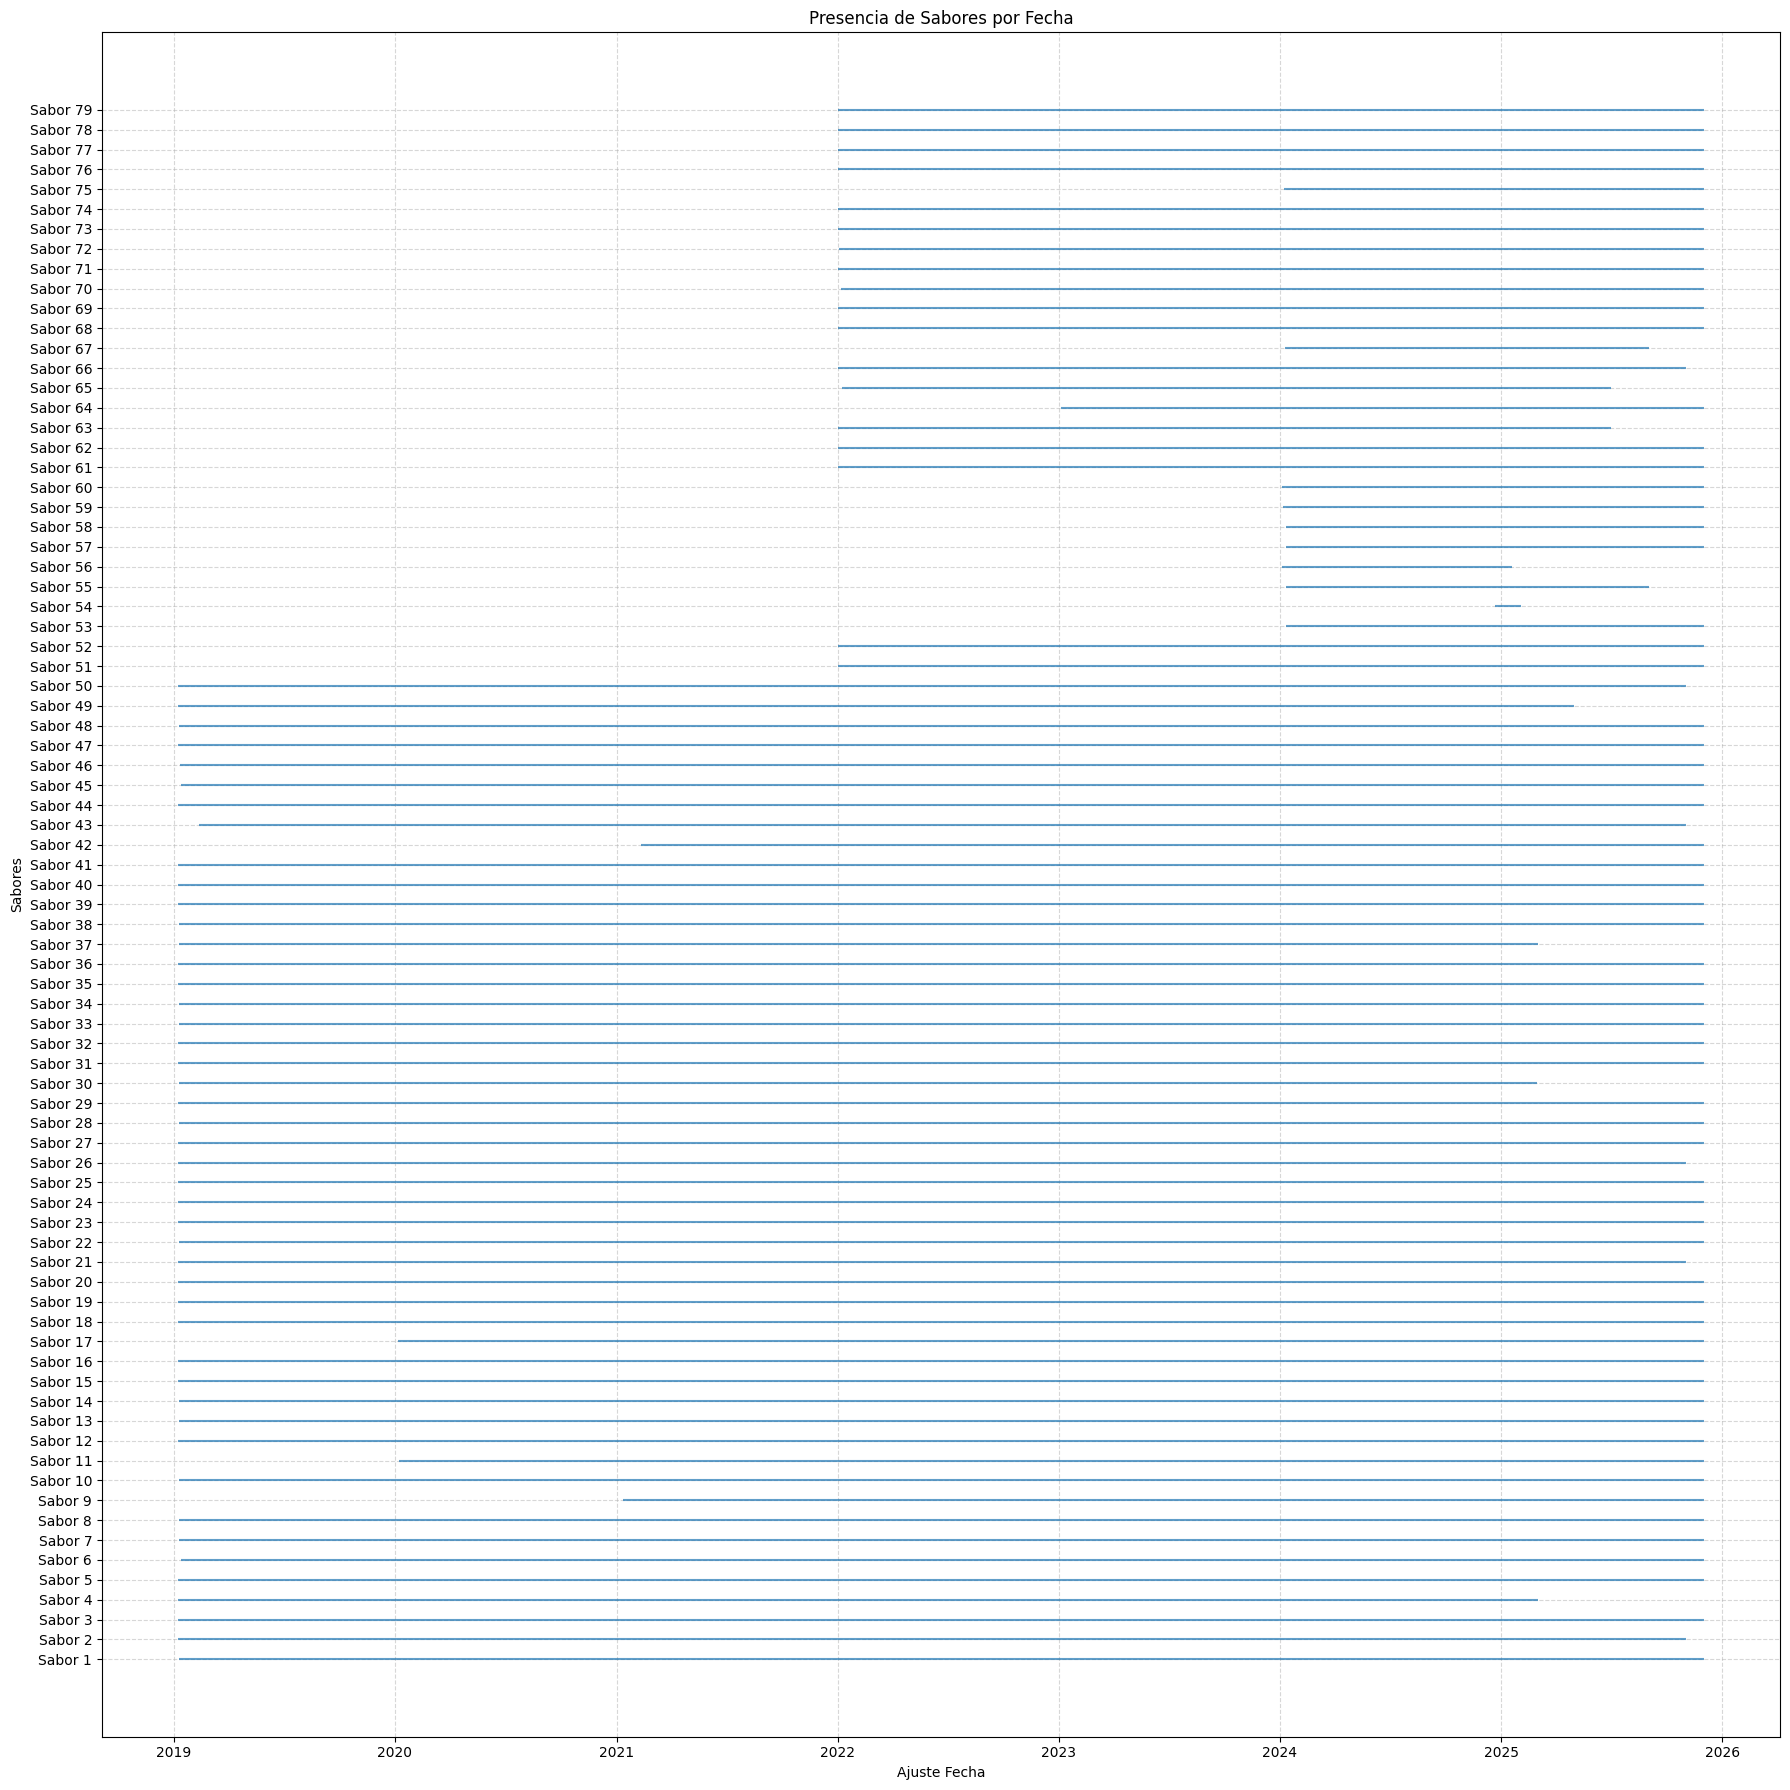

In [19]:
plt.figure(figsize=(18, 18))  # Aumentar el grosor y la altura de la figura
for i, col in enumerate(sabor_cols, start=1):
    non_null_dates = prueba.loc[prueba[col].notnull(), 'Ajuste Fecha']
    plt.hlines(y=i, xmin=non_null_dates.min(), xmax=non_null_dates.max(), label=col, alpha=0.7)

plt.title('Presencia de Sabores por Fecha')
plt.xlabel('Ajuste Fecha')
plt.ylabel('Sabores')
plt.yticks(ticks=range(1, len(sabor_cols) + 1), labels=sabor_cols)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'KG totales producidos por Año')

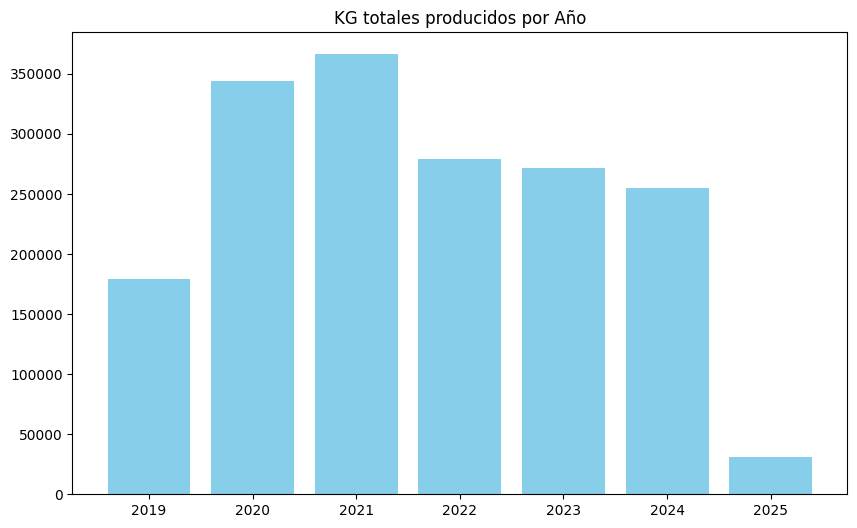

In [21]:
# Grafico de barras sobre ventas totales por año
prueba['Ajuste Fecha'] = pd.to_datetime(prueba['Ajuste Fecha'])
prueba['Año'] = prueba['Ajuste Fecha'].dt.year
ventas_por_año = prueba.groupby('Año')['Total'].sum().reset_index()
plt.figure(figsize=(10, 6))
#ventas_por_año['Año'] = ventas_por_año['Año'].astype(str)  # Convertir a string para el eje x
plt.bar(ventas_por_año['Año'], ventas_por_año['Total'], color='skyblue')
plt.title('KG totales producidos por Año')